## Analise de pessoas com e sem máscara usando o Keras 

Se baseando no mnist

In [1]:
!pip install tensorflow_datasets
import tensorflow as tf
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

## Carregando as imagens para testes

Carregando as imagens usando o Keras 

In [2]:
import random

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [4]:
seed_salva=random.randint(60, 120000)
(dt_validation)=tf.keras.preprocessing.image_dataset_from_directory(
    "./dataset/dataset",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=seed_salva,
    validation_split=0.25,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

(dt_training)=tf.keras.preprocessing.image_dataset_from_directory(
    "./dataset/dataset",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=seed_salva,
    validation_split=0.25,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 1376 files belonging to 2 classes.
Using 344 files for validation.
Found 1376 files belonging to 2 classes.
Using 1032 files for training.


In [5]:
dt_validation

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [6]:
dt_training

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [7]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(256, 256,3)),
  tf.keras.layers.Dense(512,activation="relu",input_shape=(256,256)),
  tf.keras.layers.Dense(1,activation="sigmoid")
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 196608)            0         
                                                                 
 dense (Dense)               (None, 512)               100663808 
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 100,664,321
Trainable params: 100,664,321
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy",tf.keras.metrics.Precision(),tf.keras.metrics.Recall()],
)


In [10]:
history=model.fit(
    dt_training,
    epochs=10,
    validation_data=dt_validation
)

Epoch 1/10
33/33 [==============================] - 13s 367ms/step - loss: 17433.5273 - accuracy: 0.5698 - precision: 0.5594 - recall: 0.6012 - val_loss: 8221.1318 - val_accuracy: 0.6163 - val_precision: 0.9804 - val_recall: 0.2762
Epoch 2/10
33/33 [==============================] - 12s 358ms/step - loss: 1851.1903 - accuracy: 0.8072 - precision: 0.8039 - recall: 0.8055 - val_loss: 778.3250 - val_accuracy: 0.8488 - val_precision: 0.8086 - val_recall: 0.9337
Epoch 3/10
33/33 [==============================] - 12s 359ms/step - loss: 625.6992 - accuracy: 0.8905 - precision: 0.8837 - recall: 0.8959 - val_loss: 750.8709 - val_accuracy: 0.8459 - val_precision: 0.7783 - val_recall: 0.9890
Epoch 4/10
33/33 [==============================] - 12s 360ms/step - loss: 841.9305 - accuracy: 0.8498 - precision: 0.8352 - recall: 0.8664 - val_loss: 453.4217 - val_accuracy: 0.9041 - val_precision: 0.8700 - val_recall: 0.9613
Epoch 5/10
33/33 [==============================] - 12s 358ms/step - loss: 1361.

In [11]:
history

In [12]:
model

In [13]:

image=tf.keras.preprocessing.image.load_img(
    "./mascara.jpg", grayscale=False, color_mode="rgb", target_size=(256,256), interpolation="nearest"
)
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
model.predict(input_arr)[0][0]


1.0

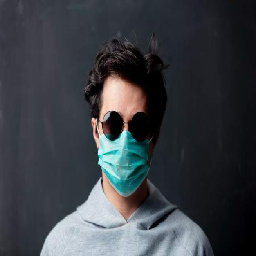

In [14]:
image


In [15]:

image=tf.keras.preprocessing.image.load_img(
    "./mulher-colocando-mascara.jpg", grayscale=False, color_mode="rgb", target_size=(256,256), interpolation="nearest"
)
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
model.predict(input_arr)[0][0]

1.0

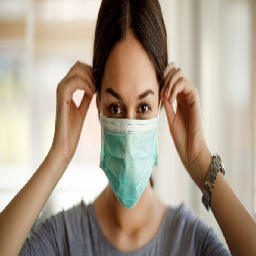

In [16]:
image

In [17]:
image=tf.keras.preprocessing.image.load_img(
    "./wolverine.png", grayscale=False, color_mode="rgb", target_size=(256,256), interpolation="nearest"
)
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
model.predict(input_arr)[0][0]

0.0

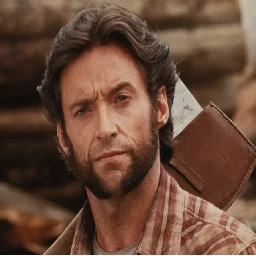

In [18]:
image

In [19]:
accuracy=history.history['accuracy']
precision=history.history["precision"]
loss=history.history["loss"]
val_loss=history.history["val_loss"]
recall=history.history["recall"]
f1_score= [2*(p*r)/(p+r) for p,r in zip(precision,recall)]


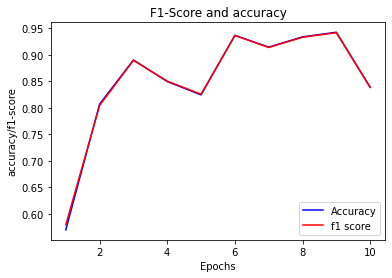

In [20]:
epochs_count=len(f1_score)
epochs_range=range(1,epochs_count+1)
len(epochs_range)
plt.plot(epochs_range, accuracy, 'b', label='Accuracy')
plt.plot(epochs_range, f1_score, 'r', label='f1 score')
plt.title('F1-Score and accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy/f1-score')
plt.legend()
plt.show()

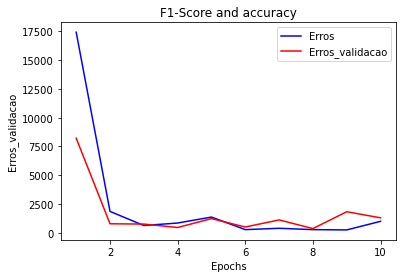

In [21]:
plt.clf()
plt.plot(epochs_range, loss, 'b', label='Erros')
plt.plot(epochs_range, val_loss, 'r', label='Erros_validacao')
plt.title('F1-Score and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Erros')
plt.ylabel('Erros_validacao')
plt.legend()
plt.show()

## Modelo Convolucional

In [22]:
from tensorflow.keras import layers

model_conv = tf.keras.models.Sequential([
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)), 
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Flatten(),
  layers.Dense(1024, activation='relu'),
  layers.Dense(1, activation='sigmoid')  
])

In [23]:
model_conv.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)     

In [24]:
#model.compile(
#    optimizer="adam",
#    loss="binary_crossentropy",
#    metrics=["accuracy"],
#)



model_conv.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(learning_rate=1e-4),
metrics=["accuracy",tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [25]:
history_conv=model_conv.fit(
    dt_training,
    epochs=16,
    validation_data=dt_validation
)

Epoch 1/16
33/33 [==============================] - 39s 1s/step - loss: 29.8323 - accuracy: 0.6579 - precision_1: 0.6450 - recall_1: 0.6817 - val_loss: 4.0268 - val_accuracy: 0.5552 - val_precision_1: 0.5419 - val_recall_1: 1.0000
Epoch 2/16
33/33 [==============================] - 38s 1s/step - loss: 0.9135 - accuracy: 0.8353 - precision_1: 0.8229 - recall_1: 0.8487 - val_loss: 0.2255 - val_accuracy: 0.9390 - val_precision_1: 0.9878 - val_recall_1: 0.8950
Epoch 3/16
33/33 [==============================] - 38s 1s/step - loss: 0.5562 - accuracy: 0.8828 - precision_1: 0.8804 - recall_1: 0.8821 - val_loss: 1.2418 - val_accuracy: 0.7674 - val_precision_1: 0.6935 - val_recall_1: 1.0000
Epoch 4/16
33/33 [==============================] - 38s 1s/step - loss: 0.1684 - accuracy: 0.9448 - precision_1: 0.9449 - recall_1: 0.9430 - val_loss: 0.1894 - val_accuracy: 0.9390 - val_precision_1: 0.9124 - val_recall_1: 0.9779
Epoch 5/16
33/33 [==============================] - 38s 1s/step - loss: 0.4289 

In [26]:
image=tf.keras.preprocessing.image.load_img(
   "./mascara.jpg", grayscale=False, color_mode="rgb", target_size=(256,256), interpolation="nearest"
)
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
model_conv.predict(input_arr)[0][0]


1.0

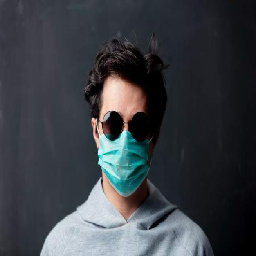

In [27]:
image

In [28]:
image=tf.keras.preprocessing.image.load_img(
   "./mulher-colocando-mascara.jpg", grayscale=False, color_mode="rgb", target_size=(256,256), interpolation="nearest"
)
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
model_conv.predict(input_arr)[0][0]

1.0

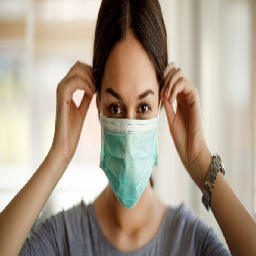

In [29]:
image

In [30]:
image=tf.keras.preprocessing.image.load_img(
    "./wolverine.png", grayscale=False, color_mode="rgb", target_size=(256,256), interpolation="nearest"
)
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
model_conv.predict(input_arr)[0][0]

2.9878905e-05

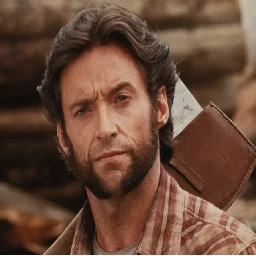

In [31]:
image

In [38]:
accuracy=history_conv.history['accuracy']
loss=history_conv.history["loss"]
val_loss=history_conv.history["val_loss"]
precision=history_conv.history["precision_1"]
recall=history_conv.history["recall_1"]
f1_score= [2*(p*r)/(p+r) for p,r in zip(precision,recall)]

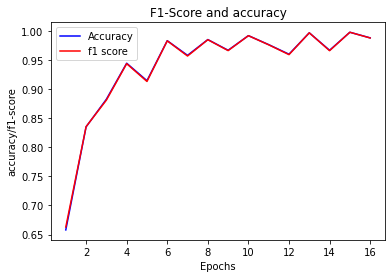

In [40]:
epochs_count=len(f1_score)
epochs_range=range(1,epochs_count+1)
len(epochs_range)
plt.plot(epochs_range, accuracy, 'b', label='Accuracy')
plt.plot(epochs_range, f1_score, 'r', label='f1 score')
plt.title('F1-Score and accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy/f1-score')
plt.legend()
plt.show()

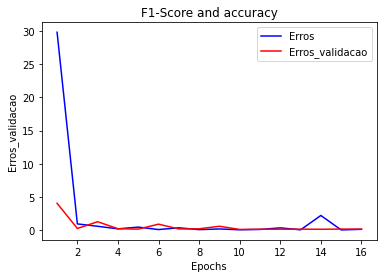

In [43]:
plt.clf()
plt.plot(epochs_range, loss, 'b', label='Erros')
plt.plot(epochs_range, val_loss, 'r', label='Erros_validacao')
plt.title('F1-Score and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Erros')
plt.ylabel('Erros_validacao')
plt.legend()
plt.show()